## CO<sub>2</sub> adsorption (mmol/g) _ 2 bins 72/28 _ lr = 3e-4 _ 30 epochs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Any, Collection, Dict, List, Optional, Tuple, Union
from numpy.typing import ArrayLike
from fastcore.all import L
import pycm

In [3]:
def evaluate_classification(
    y_true: ArrayLike,
    y_pred: ArrayLike,
) -> Dict[str, Any]:
    """Evaluate a classification task.

    Args:
        y_true (ArrayLike): The true labels.
        y_pred (ArrayLike): The predicted labels.

    Returns:
        Dict[str, Any]: A dictionary of metrics.
    """
    might_have_rounded_floats = False
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length."
    y_true = L([int(x) for x in y_true])

    y_pred_new = []
    int_indices = []
    for i, x in enumerate(y_pred):
        try:
            x_int = int(x)
            if x_int != x:
                might_have_rounded_floats = True
                logger.warning("y_pred contains rounded floats.")
            y_pred_new.append(x_int)
            int_indices.append(i)
        except Exception as e:
            y_pred_new.append(None)
    y_pred_new = L(y_pred_new)

    frac_valid = len(int_indices) / len(y_true)
    if len(int_indices) == 0:
        logger.warning("No valid predictions found.")
        y_pred_valid = L([None] * len(y_true))
        y_true_valid = y_true

    else:
        y_true_valid = y_true[int_indices]
        y_pred_valid = y_pred_new[int_indices]

    cm = pycm.ConfusionMatrix(list(y_true_valid), list(y_pred_valid))
    return {
        "accuracy": cm.Overall_ACC,
        "acc_macro": cm.ACC_Macro,
        "racc": cm.Overall_RACC,
        "kappa": cm.Kappa,
        "confusion_matrix": cm,
        "f1_macro": cm.F1_Macro,
        "f1_micro": cm.F1_Micro,
        "frac_valid": frac_valid,
        "all_y_true": y_true,
        "all_y_pred": y_pred,
        "valid_indices": int_indices,
        "might_have_rounded_floats": might_have_rounded_floats,
    }

In [4]:
from glob import glob
from fastcore.xtras import load_pickle
import os 
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt 
import matplotlib as mpl
#import seaborn as sns
import numpy as np 

from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 3.25
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

import sys

sys.path.append("../plotutils/")
from plotutils import *

plt.style.use("../plotutils/your.mplstyle")

import matplotx

In [5]:
all_res = glob(f"./woBIAS_30ep_3e-4/*.pkl")
print(f"Pickles found: {len(all_res)}")

Pickles found: 20


### ADJUST dictionary according to experiment

In [6]:
compiled_res_list = []
conf_mats = []

for res in all_res:
    res = load_pickle(res)
    nan_prediction_mask = np.isnan(res["predictions"]) 
    try:
        results = evaluate_classification(res["targets"], res["predictions"][~nan_prediction_mask])
    except:
        results = evaluate_classification(res["true"], res["predictions"][~nan_prediction_mask])
    summary = {
        'train_size': res['train_size'],
        'accuracy': results['accuracy'],
        'acc_macro': results['acc_macro'],
        'racc': results['racc'],
        'kappa': results['kappa'],
        'f1_macro': results['f1_macro'],
        'f1_micro': results['f1_micro'],
        'frac_valid': results['frac_valid'],
        'valid_indices': results['valid_indices'],
        'might_have_rounded_floats': results['might_have_rounded_floats'],
    }
    
    confusion_matrix = {
        'all_y_true': results['all_y_true'],
        'all_y_pred': results['all_y_pred']
    }
    
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [7]:
compiled_res = pd.DataFrame(compiled_res_list)

In [8]:
compiled_res = compiled_res.iloc[:, 0:8]
compiled_res

,train_size,accuracy,acc_macro,racc,kappa,f1_macro,f1_micro,frac_valid
0,200,0.502262,0.502262,0.474663,0.052537,0.487909,0.502262,1.0
1,380,0.804878,0.804878,0.562165,0.554348,0.774725,0.804878,1.0
2,200,0.520362,0.520362,0.535472,-0.032528,0.471816,0.520362,1.0
3,300,0.628099,0.628099,0.516905,0.230171,0.600132,0.628099,1.0
4,380,0.658537,0.658537,0.494349,0.324706,0.641250,0.658537,1.0
5,100,0.454829,0.454829,0.485224,-0.059046,0.433703,0.454829,1.0
6,200,0.484163,0.484163,0.490879,-0.013191,0.461851,0.484163,1.0
7,300,0.619835,0.619835,0.498122,0.242515,0.599914,0.619835,1.0
8,380,0.731707,0.731707,0.528257,0.431274,0.706571,0.731707,1.0
9,200,0.497738,0.497738,0.513175,-0.031711,0.463275,0.497738,1.0


### ADJUST columns according to grouping

In [9]:
grouped_res = compiled_res.groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy           acc_macro                racc            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
100         0.435514  0.013158  0.435514  0.013158  0.484943  0.029506   
200         0.489593  0.012910  0.489593  0.012910  0.505473  0.010442   
300         0.646281  0.014645  0.646281  0.014645  0.516153  0.008517   
380         0.736585  0.030267  0.736585  0.030267  0.535039  0.014563   

               kappa            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
100        -0.104932  0.043411  0.403004  0.011953  0.435514  0.013158   
200        -0.033628  0.031515  0.458020  0.013983  0.489593  0.012910   
300         0.269995  0.019540  0.619912  0.012202  0.646281  0.014645   
380         0.432602  0.064866  0.707651  0.033407  0.736585  0.030267   

           frac_valid       
                 mean  sem  
train_size                  
100               1.0  0.0  
200               1.0  0.0  
300               1.0  0.0  
380               1.0  0.0

[[0.71333333 0.28666667]
 [0.2        0.8       ]]
accuracy: 0.7566666666666667


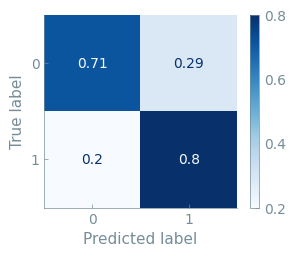

In [10]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]
confusion_matrix_max = []
for index, _ in enumerate(conf_mats_max):
    try:
        preds = conf_mats_max[index]
        actual = preds["all_y_true"]
        predicted = preds["all_y_pred"]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        confusion_matrix_max.append(confusion_matrix)
    except Exception as e:
        print(e)
norm_confusion_matrix = sum(confusion_matrix_max)/[[sum(sum(confusion_matrix_max)[0])], [sum(sum(confusion_matrix_max)[1])]]
print(norm_confusion_matrix)

acc1=0
for i in range(len(norm_confusion_matrix)):
    acc=norm_confusion_matrix[i][i]
    acc1=acc1+acc
acc=acc1/sum(sum(norm_confusion_matrix))

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = norm_confusion_matrix, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.savefig('classif_CO2ads_confusionMatrix_72_28_30ep_size380.pdf', bbox_inches='tight')

In [11]:
sizes = np.sort(compiled_res["train_size"].unique())
print(sizes)

[100 200 300 380]


In [12]:
print(grouped_res.loc[sizes, :]['accuracy'])

                mean       sem
train_size                    
100         0.435514  0.013158
200         0.489593  0.012910
300         0.646281  0.014645
380         0.736585  0.030267


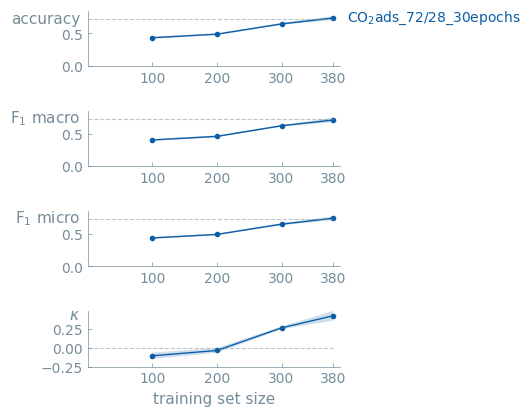

In [13]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

n_bins = 2
representations = ['72/28_30epochs']

for representation in representations:
    ax[0].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean'],
        marker='o',
        label=f'CO$_2$ads_{representation}'
    )
    ax[0].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean']
        -grouped_res.loc[sizes, :]['accuracy']['sem'],
        grouped_res.loc[sizes, :]['accuracy']['mean']
        +grouped_res.loc[sizes, :]['accuracy']['sem'],
        alpha = 0.2
    )
    
    ax[0].hlines(0.85, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[0].hlines(0.72, 0, 380, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[0].hlines(0, 380, 390, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top('accuracy', ax=ax[0])
    ax[0].set_xticks(sizes)

    ax[1].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[1].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        -grouped_res.loc[sizes, :]['f1_macro']['sem'],
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        +grouped_res.loc[sizes, :]['f1_macro']['sem'],
        alpha=0.2
    )

    ax[1].hlines(0.85, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[1].hlines(0.72, 0, 380, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[1].hlines(0, 380, 390, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ macro', ax=ax[1])
    ax[1].set_xticks(sizes)

    ax[2].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean'],
        marker='o',
        label=f'{representation}'
    )

    ax[2].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        -grouped_res.loc[sizes, :]['f1_micro']['sem'],
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        +grouped_res.loc[sizes, :]['f1_micro']['sem'],
        alpha=0.2
    )

    ax[2].hlines(0.85, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[2].hlines(0.72, 0, 380, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[2].hlines(0, 380, 390, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ micro', ax=ax[2])
    ax[2].set_xticks(sizes)

    ax[3].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[3].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean']
        -grouped_res.loc[sizes, :]['kappa']['sem'],
        grouped_res.loc[sizes, :]['kappa']['mean']
        +grouped_res.loc[sizes, :]['kappa']['sem'],
        alpha=0.2
    )
    
    ax[3].hlines(0, 0, 380, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[3].hlines(-0.25, 380, 390, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'$\kappa$', ax=ax[3])
    ax[3].set_xticks(sizes)

ax[-1].set_xlabel('training set size')

matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
fig.savefig('classif_CO2ads_72_28_30ep_size380.pdf', bbox_inches='tight')